<a href="https://colab.research.google.com/github/Sahilmandalwar/campusx_machine_learning_code/blob/main/ML_020_ModifiedPerceptronTrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_samples=100, n_informative=1,n_features=2,random_state=42,n_redundant=0,n_clusters_per_class=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

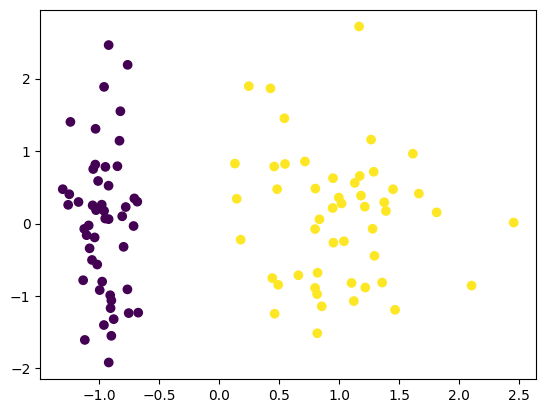

In [ ]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [ ]:
def normal_perceptron_trick(X,y):
  X = np.insert(X,1,0,axis=1)
  weight = np.ones(X.shape[1])
  lr = 0.1
  epoches = 1000

  for epoch in range(epoches):
    j = np.random.randint(X.shape[0])
    y_hat = step(np.dot(X[j],weight))
    weight = weight + lr*(y[j] - y_hat)*X[j]

  return weight[0], weight[1:]


def step(n):
  return 1 if n > 0 else 0

In [ ]:
def modified_perceptron_trick(X,y):
  X = np.insert(X,1,0,axis=1)
  weight = np.ones(X.shape[1])
  lr = 0.1
  epoches = 1000

  for epoch in range(epoches):
    j = np.random.randint(X.shape[0])
    y_hat = sigmoid_function(np.dot(X[j],weight))
    weight = weight + lr*(y[j] - y_hat)*X[j]

  return weight[0], weight[1:]
def sigmoid_function(n):
  return (1 + math.exp(-n))**(-1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X,y)

LogisticRegression()

In [ ]:
lr.coef_

array([[3.54063897, 0.15477616]])

In [ ]:
lr.intercept_

array([0.36752196])

In [ ]:
npt = normal_perceptron_trick(X,y)

In [ ]:
mpt = modified_perceptron_trick(X,y)

In [ ]:
lr_m = -lr.coef_[0][0]/lr.coef_[0][1]

In [ ]:
lr_c = -lr.intercept_[0]/ lr.coef_[0][1]

In [ ]:
npt_m = -npt[1][0] / npt[1][1]
npt_c = -npt[0] / npt[1][1]

In [ ]:
mpt_m = -mpt[1][0] / mpt[1][1]
mpt_c = -mpt[0] / mpt[1][1]

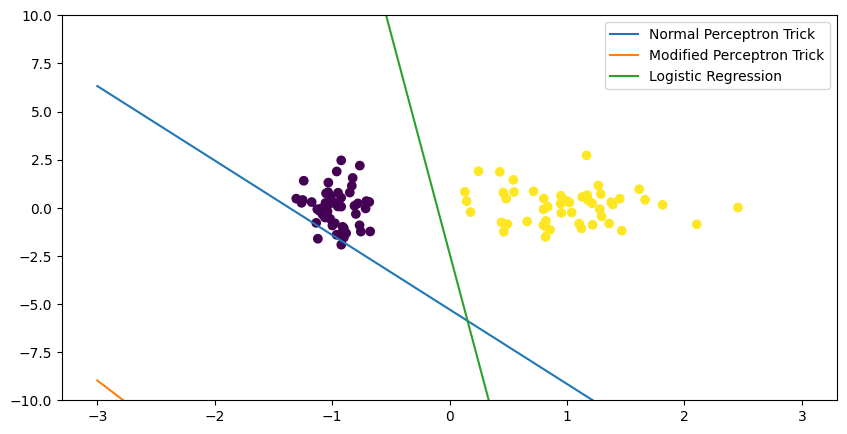

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x=X[:,0],y=X[:,1],c=y)
x_point = np.linspace(-3,3,100)
plt.plot(x_point,x_point*npt_m + npt_c, label="Normal Perceptron Trick")
plt.plot(x_point,x_point*mpt_m + mpt_c, label="Modified Perceptron Trick")
plt.plot(x_point,x_point*lr_m + lr_c , label="Logistic Regression")
plt.ylim(-10,10)
plt.legend()
plt.show()
